<a href="https://colab.research.google.com/github/ricardosaj/Bootcamp-Data-Science-Alura/blob/ricardosaj-superdesafio02_bootcampDS_Alura/SuperDesafio_Modulo_02_Oficial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/ricardosaj/Bootcamp-Data-Science-Alura/main/teste1.csv",
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=20,
                    thousands=".", decimal=",")
dados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,11 Rondônia,647582,435345,427785,487788,664623,692060,619782,580329,554429,344707,5454430
1,12 Acre,375827,257132,240469,240916,254867,294119,259444,265563,266548,183891,2638776
2,13 Amazonas,1658753,1090240,1149204,1173912,1546920,1721877,1404249,1412102,1435823,996366,13589446
3,14 Roraima,216961,146403,134478,137917,223255,261569,223781,223177,237162,146819,1951522
4,15 Pará,3535221,2159285,2120596,2217128,2577588,2121121,1986047,2067185,1994916,1299432,22078519
5,16 Amapá,318085,200416,201291,235158,291264,317476,309878,240586,241570,165800,2521524
6,17 Tocantins,599042,393544,364498,419059,520696,500465,473930,496697,469306,337453,4574690
7,21 Maranhão,3420909,1938353,1834049,2049197,2506954,2470155,1768910,1804725,1808791,1123803,20725846
8,22 Piauí,1274272,790815,767241,830563,929808,843986,766717,794144,813143,520133,8330822
9,23 Ceará,3358407,1973183,1875068,2162076,3097412,3090798,2772563,2527779,2596746,1559778,25013810


In [3]:
dados["uf"] = dados["Unidade da Federação"].str.slice(start=3)
dados["Unidade da Federação"] = dados["uf"]
dados.head()

,Unidade da Federação,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total,uf
0,Rondônia,647582,435345,427785,487788,664623,692060,619782,580329,554429,344707,5454430,Rondônia
1,Acre,375827,257132,240469,240916,254867,294119,259444,265563,266548,183891,2638776,Acre
2,Amazonas,1658753,1090240,1149204,1173912,1546920,1721877,1404249,1412102,1435823,996366,13589446,Amazonas
3,Roraima,216961,146403,134478,137917,223255,261569,223781,223177,237162,146819,1951522,Roraima
4,Pará,3535221,2159285,2120596,2217128,2577588,2121121,1986047,2067185,1994916,1299432,22078519,Pará


In [4]:
dados = dados.drop("Total", axis=1)
dados = dados.drop("uf",axis=1)
dados.head()

,Unidade da Federação,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Rondônia,647582,435345,427785,487788,664623,692060,619782,580329,554429,344707
1,Acre,375827,257132,240469,240916,254867,294119,259444,265563,266548,183891
2,Amazonas,1658753,1090240,1149204,1173912,1546920,1721877,1404249,1412102,1435823,996366
3,Roraima,216961,146403,134478,137917,223255,261569,223781,223177,237162,146819
4,Pará,3535221,2159285,2120596,2217128,2577588,2121121,1986047,2067185,1994916,1299432


In [5]:
dados = dados.rename(columns={'Unidade da Federação':'uf'})
dados = dados.set_index("uf")
dados.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
uf,,,,,,,,,,
Rondônia,647582,435345,427785,487788,664623,692060,619782,580329,554429,344707
Acre,375827,257132,240469,240916,254867,294119,259444,265563,266548,183891
Amazonas,1658753,1090240,1149204,1173912,1546920,1721877,1404249,1412102,1435823,996366
Roraima,216961,146403,134478,137917,223255,261569,223781,223177,237162,146819
Pará,3535221,2159285,2120596,2217128,2577588,2121121,1986047,2067185,1994916,1299432


In [6]:
sudeste = dados.T[['Rio de Janeiro','São Paulo','Minas Gerais','Espírito Santo']]
sudeste.head()
sudeste = sudeste.T
sudeste.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
uf,,,,,,,,,,
Rio de Janeiro,5397199,3271147,3034612,3452853,4792974,4947569,4269415,4170602,3678944,1506798
São Paulo,14671666,9151228,8821199,10297960,13755784,13859265,10615615,11187566,11407247,7249108
Minas Gerais,7414886,4334695,3998586,4784266,5908170,5849587,5192087,5320343,5380265,3396051
Espírito Santo,1318686,818355,783980,882253,1221179,1220295,1018857,980208,1042704,697564


In [7]:
norte = dados.T[['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins']]
norte.head()
norte = norte.T
norte.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
uf,,,,,,,,,,
Acre,375827,257132,240469,240916,254867,294119,259444,265563,266548,183891
Amapá,318085,200416,201291,235158,291264,317476,309878,240586,241570,165800
Amazonas,1658753,1090240,1149204,1173912,1546920,1721877,1404249,1412102,1435823,996366
Pará,3535221,2159285,2120596,2217128,2577588,2121121,1986047,2067185,1994916,1299432
Rondônia,647582,435345,427785,487788,664623,692060,619782,580329,554429,344707


In [8]:
nordeste = dados.T[['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe']]
nordeste.head()
nordeste = nordeste.T
nordeste.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
uf,,,,,,,,,,
Alagoas,1310661,736926,747338,840673,1124168,1114133,871125,905807,926598,584861
Bahia,5651502,3319588,3222132,3568011,4552090,4326712,3231420,3317966,3165767,1933369
Ceará,3358407,1973183,1875068,2162076,3097412,3090798,2772563,2527779,2596746,1559778
Maranhão,3420909,1938353,1834049,2049197,2506954,2470155,1768910,1804725,1808791,1123803
Paraíba,1547527,894610,815971,963126,1185760,1091866,933768,946139,974210,608801


In [9]:
sul = dados.T[['Paraná', 'Santa Catarina', 'Rio Grande do Sul']]
sul.head()
sul = sul.T
sul.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
uf,,,,,,,,,,
Paraná,3911435,2415754,2330836,2728430,3393790,3425656,2978313,3121299,3143311,2226662
Santa Catarina,2158029,1322747,1277068,1467668,2047870,2066422,1789983,1742437,1933449,1436410
Rio Grande do Sul,3411391,1972214,1861452,2326594,2980144,2808159,2601252,2633986,2675382,1829584


In [10]:
centrooeste = dados.T[['Goiás', 'Mato Grosso', 'Mato Grosso do Sul', 'Distrito Federal']]
centrooeste.head()
centrooeste = centrooeste.T
centrooeste.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
uf,,,,,,,,,,
Goiás,2274623,1515006,1375687,1637161,2068419,2012864,1808414,1852394,1764350,1139751
Mato Grosso,1151191,762483,754284,882673,1204418,1218562,1117107,1074008,1053524,657632
Mato Grosso do Sul,993508,647692,639969,792827,1186794,1097563,937525,888047,900946,569408
Distrito Federal,977874,582929,615304,858143,1000131,732494,1331740,910783,887622,609503


In [11]:
sudeste = sudeste.reset_index().melt(id_vars=["uf"], value_vars=sudeste.columns)
sudeste.head()

,uf,variable,value
0,Rio de Janeiro,2010,5397199
1,São Paulo,2010,14671666
2,Minas Gerais,2010,7414886
3,Espírito Santo,2010,1318686
4,Rio de Janeiro,2011,3271147


In [12]:
sudeste = sudeste.rename(columns={'value':'Vacinas aplicadas'})
sudeste = sudeste.rename(columns={'variable':'Ano'})
sudeste.head()

,uf,Ano,Vacinas aplicadas
0,Rio de Janeiro,2010,5397199
1,São Paulo,2010,14671666
2,Minas Gerais,2010,7414886
3,Espírito Santo,2010,1318686
4,Rio de Janeiro,2011,3271147


In [13]:
centrooeste = centrooeste.reset_index().melt(id_vars=["uf"], value_vars=centrooeste.columns)
centrooeste.head()

,uf,variable,value
0,Goiás,2010,2274623
1,Mato Grosso,2010,1151191
2,Mato Grosso do Sul,2010,993508
3,Distrito Federal,2010,977874
4,Goiás,2011,1515006


In [14]:
sul = sul.reset_index().melt(id_vars=["uf"], value_vars=sul.columns)
sul.head()

,uf,variable,value
0,Paraná,2010,3911435
1,Santa Catarina,2010,2158029
2,Rio Grande do Sul,2010,3411391
3,Paraná,2011,2415754
4,Santa Catarina,2011,1322747


In [15]:
nordeste = nordeste.reset_index().melt(id_vars=["uf"], value_vars=nordeste.columns)
nordeste.head()

,uf,variable,value
0,Alagoas,2010,1310661
1,Bahia,2010,5651502
2,Ceará,2010,3358407
3,Maranhão,2010,3420909
4,Paraíba,2010,1547527


In [16]:
norte = norte.reset_index().melt(id_vars=["uf"], value_vars=norte.columns)
norte.head()

,uf,variable,value
0,Acre,2010,375827
1,Amapá,2010,318085
2,Amazonas,2010,1658753
3,Pará,2010,3535221
4,Rondônia,2010,647582


In [17]:
centrooeste = centrooeste.rename(columns={'value':'Vacinas aplicadas'})
centrooeste = centrooeste.rename(columns={'variable':'Ano'})
centrooeste.head()

,uf,Ano,Vacinas aplicadas
0,Goiás,2010,2274623
1,Mato Grosso,2010,1151191
2,Mato Grosso do Sul,2010,993508
3,Distrito Federal,2010,977874
4,Goiás,2011,1515006


In [18]:
sul = sul.rename(columns={'value':'Vacinas aplicadas'})
sul = sul.rename(columns={'variable':'Ano'})
sul.head()

,uf,Ano,Vacinas aplicadas
0,Paraná,2010,3911435
1,Santa Catarina,2010,2158029
2,Rio Grande do Sul,2010,3411391
3,Paraná,2011,2415754
4,Santa Catarina,2011,1322747


In [19]:
norte = norte.rename(columns={'value':'Vacinas aplicadas'})
norte = norte.rename(columns={'variable':'Ano'})
norte.head()

,uf,Ano,Vacinas aplicadas
0,Acre,2010,375827
1,Amapá,2010,318085
2,Amazonas,2010,1658753
3,Pará,2010,3535221
4,Rondônia,2010,647582


In [20]:
nordeste = nordeste.rename(columns={'value':'Vacinas aplicadas'})
nordeste = nordeste.rename(columns={'variable':'Ano'})
nordeste.head()

,uf,Ano,Vacinas aplicadas
0,Alagoas,2010,1310661
1,Bahia,2010,5651502
2,Ceará,2010,3358407
3,Maranhão,2010,3420909
4,Paraíba,2010,1547527


In [ ]:
# def color_palette_by_values(palette_name:str ,values: pd.Series):
#   return np.array(
#       sns.color_palette(palette_name, len(values))
#   )[values.argsort().argsort()]

<Figure size 720x720 with 0 Axes>

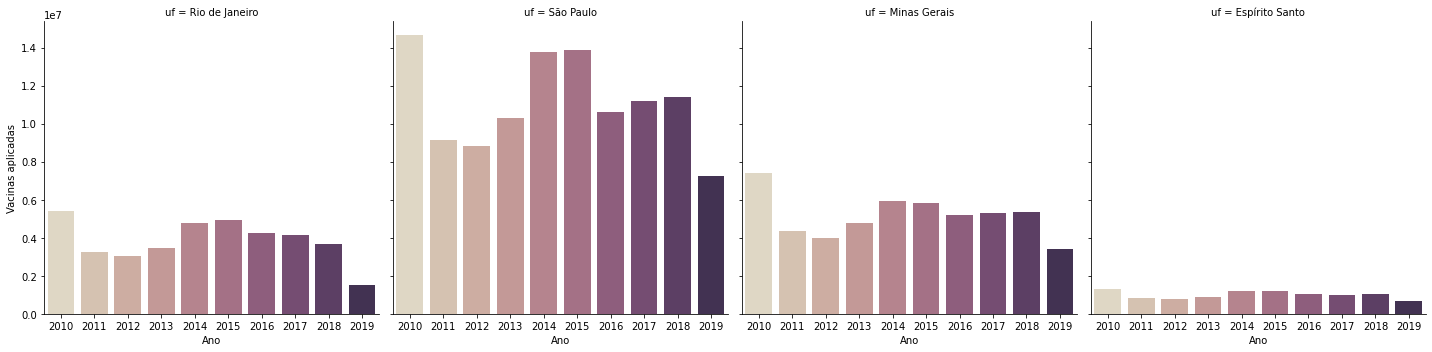

In [21]:
plt.figure(figsize=(10,10))
axsudeste = sns.catplot(data=sudeste,x="Ano",y="Vacinas aplicadas", kind='bar',col="uf", palette=sns.color_palette("ch:s=-.2,r=.6",11))
plt.show()

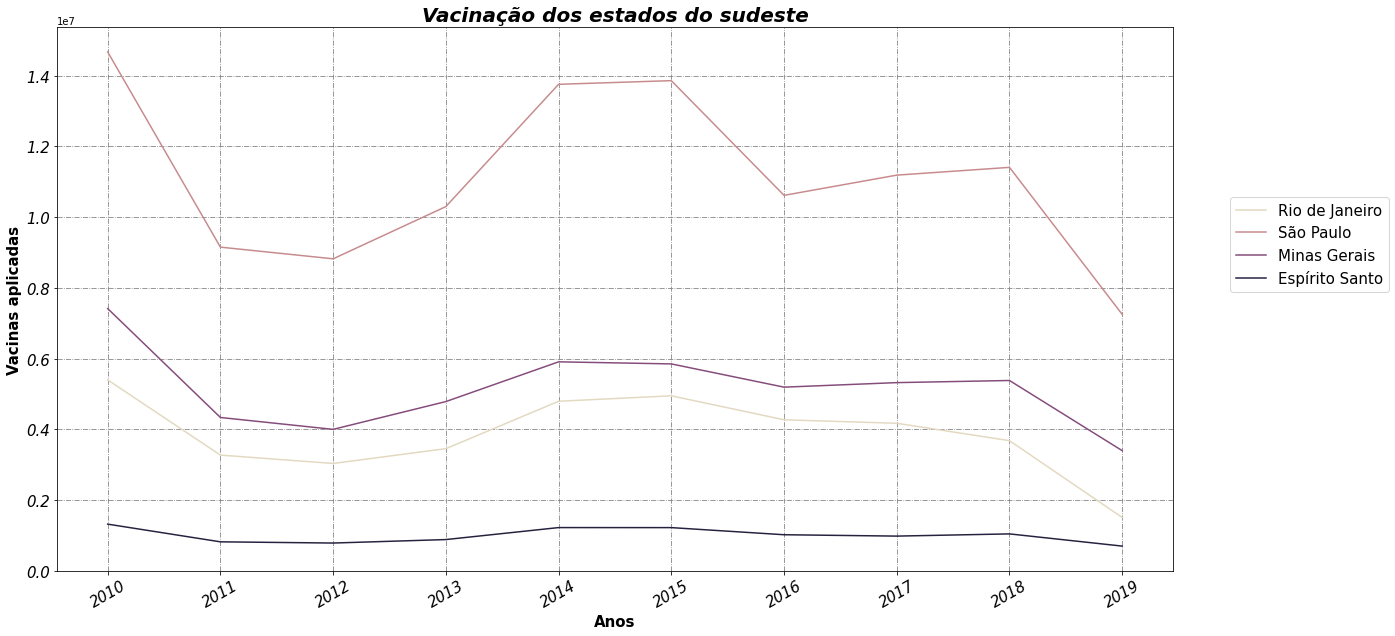

In [36]:
 plt.figure(figsize=(20,10))
 plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
 plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
 axLsudeste = sns.lineplot(data=sudeste, x="Ano",y="Vacinas aplicadas",hue="uf",palette='ch:s=-.2,r=.6')
 axLsudeste.set_title('Vacinação dos estados do sudeste', fontsize=20, fontstyle='oblique',fontweight=800)
 axLsudeste.set_ylabel('Vacinas aplicadas', fontsize=15, fontweight=600)
 axLsudeste.set_xlabel('Anos', fontsize=15, fontweight=600)
 plt.legend(bbox_to_anchor=(1.2, 0.6), loc="center right", fontsize=15, ncol=1)
 plt.grid(True, linestyle = "-.", color='gray')
 plt.show()

<Figure size 720x720 with 0 Axes>

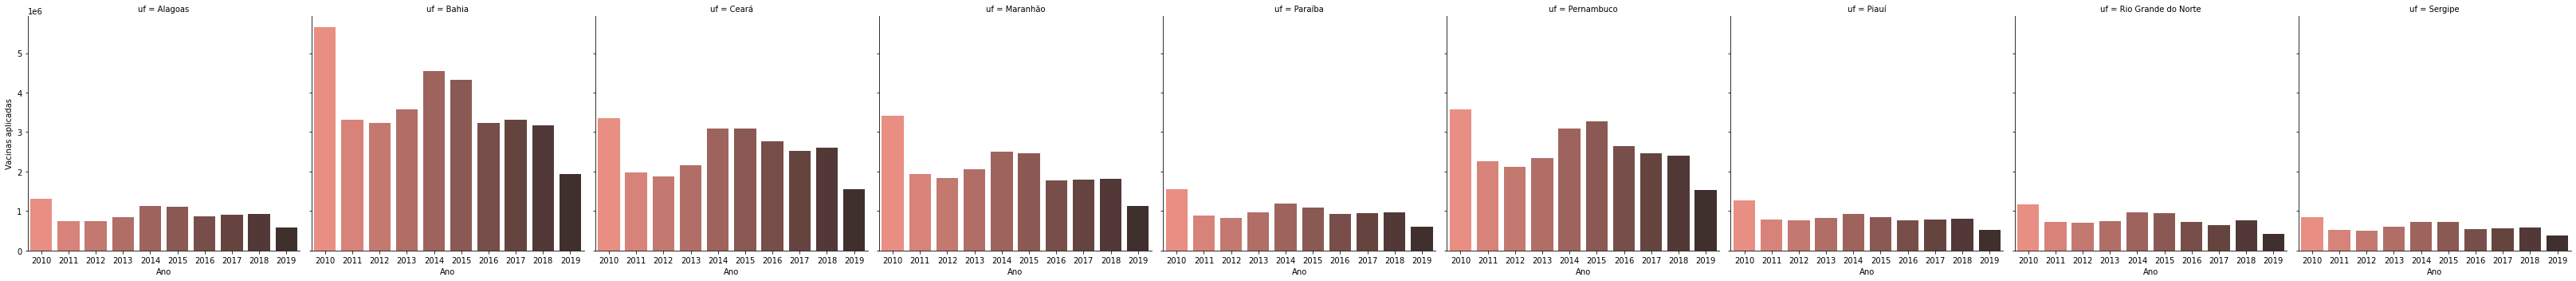

In [23]:
plt.figure(figsize=(10,10))
axnordeste = sns.catplot(data=nordeste,x="Ano",y="Vacinas aplicadas", kind='bar',col="uf", palette=sns.color_palette("dark:salmon_r",11))
plt.show()

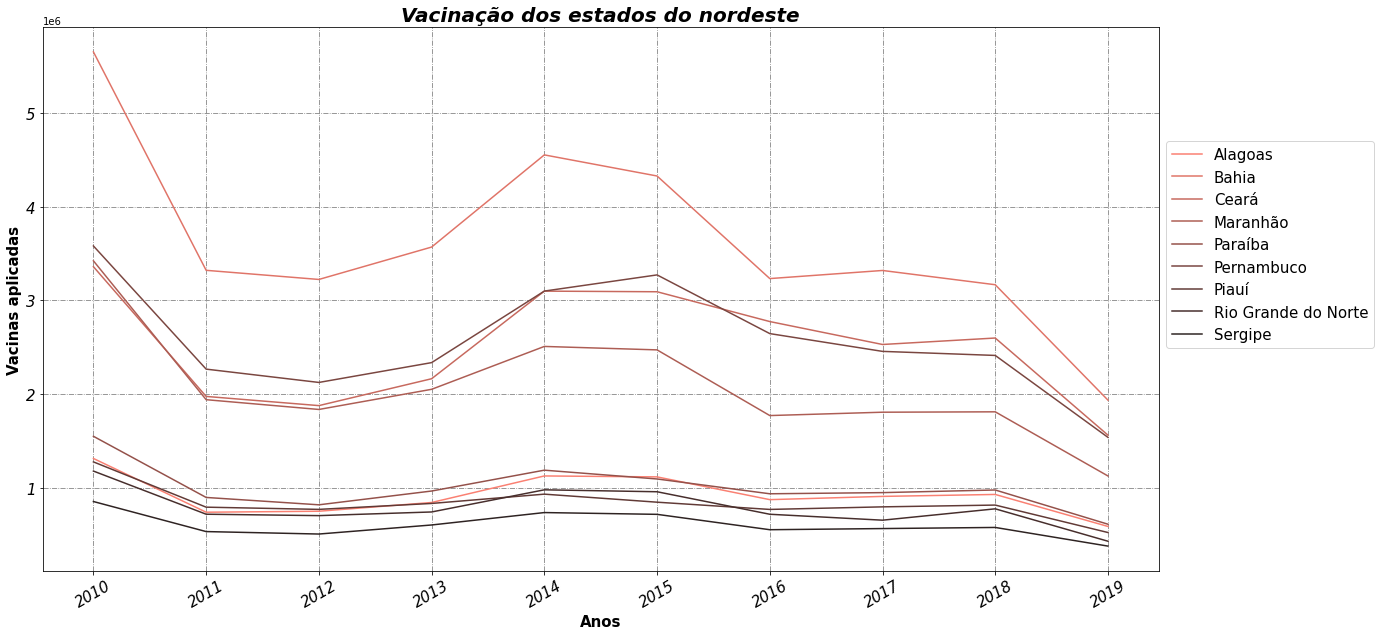

In [35]:
 plt.figure(figsize=(20,10))
 plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
 plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
 axLnordeste = sns.lineplot(data=nordeste, x="Ano",y="Vacinas aplicadas",hue="uf",palette='dark:salmon_r')
 axLnordeste.set_title('Vacinação dos estados do nordeste', fontsize=20, fontstyle='oblique',fontweight=800)
 axLnordeste.set_ylabel('Vacinas aplicadas', fontsize=15, fontweight=600)
 axLnordeste.set_xlabel('Anos', fontsize=15, fontweight=600)
 plt.legend(bbox_to_anchor=(1.2, 0.6), loc="center right", fontsize=15, ncol=1)
 plt.grid(True, linestyle = "-.", color='gray')
 plt.show()

<Figure size 720x720 with 0 Axes>

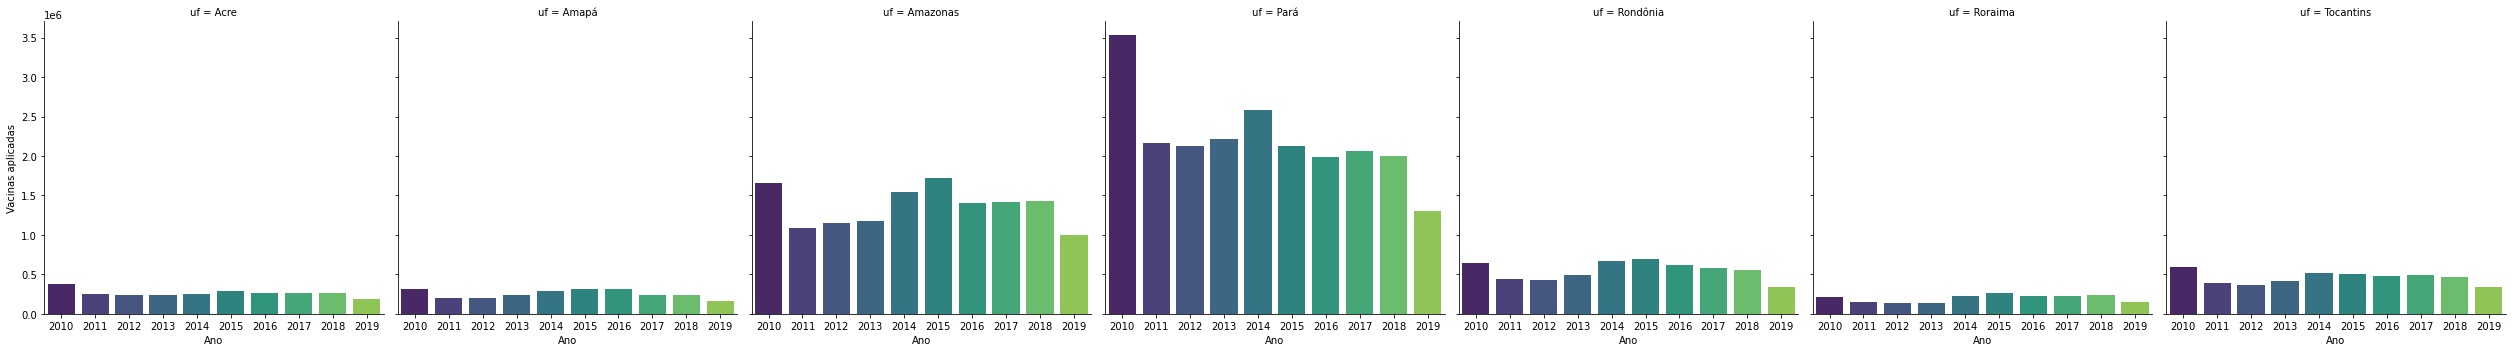

In [24]:
plt.figure(figsize=(10,10))
axnorte = sns.catplot(data=norte,x="Ano",y="Vacinas aplicadas", kind='bar',col="uf", palette=sns.color_palette("viridis",11))
plt.show()

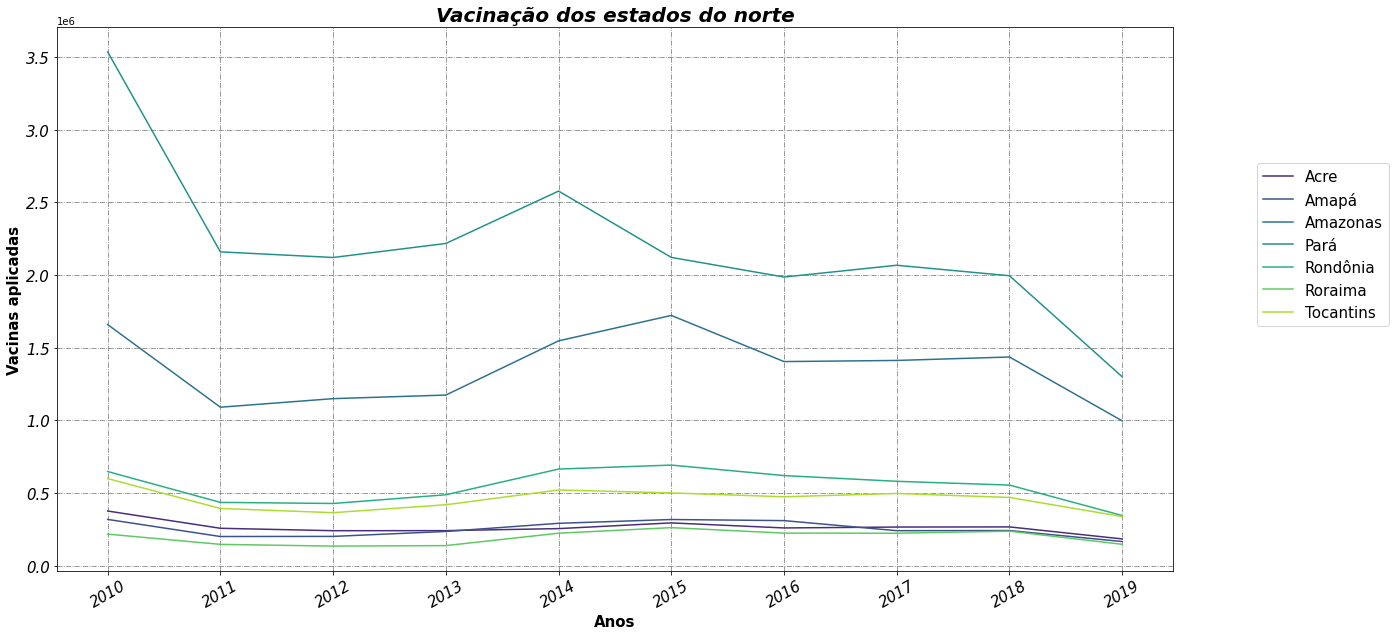

In [37]:
 plt.figure(figsize=(20,10))
 plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
 plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
 axLnorte = sns.lineplot(data=norte, x="Ano",y="Vacinas aplicadas",hue="uf",palette='viridis')
 axLnorte.set_title('Vacinação dos estados do norte', fontsize=20, fontstyle='oblique',fontweight=800)
 axLnorte.set_ylabel('Vacinas aplicadas', fontsize=15, fontweight=600)
 axLnorte.set_xlabel('Anos', fontsize=15, fontweight=600)
 plt.legend(bbox_to_anchor=(1.2, 0.6), loc="center right", fontsize=15, ncol=1)
 plt.grid(True, linestyle = "-.", color='gray')
 plt.show()

<Figure size 720x720 with 0 Axes>

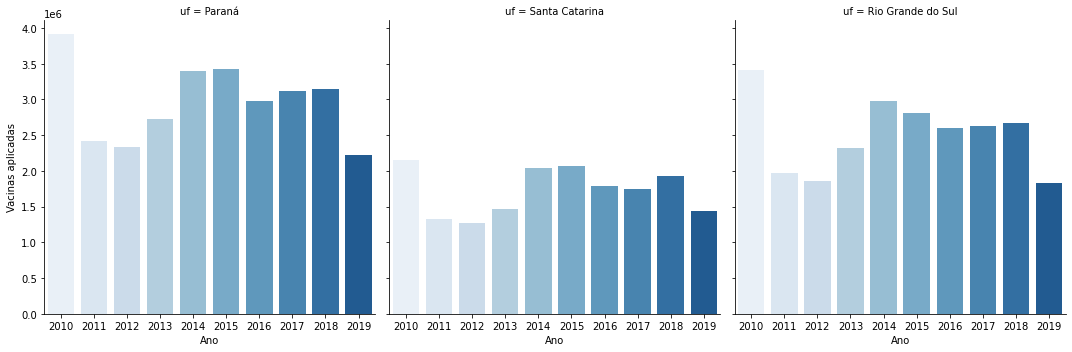

In [25]:
plt.figure(figsize=(10,10))
axsul = sns.catplot(data=sul,x="Ano",y="Vacinas aplicadas", kind='bar',col="uf", palette=sns.color_palette("Blues",11))
plt.show()

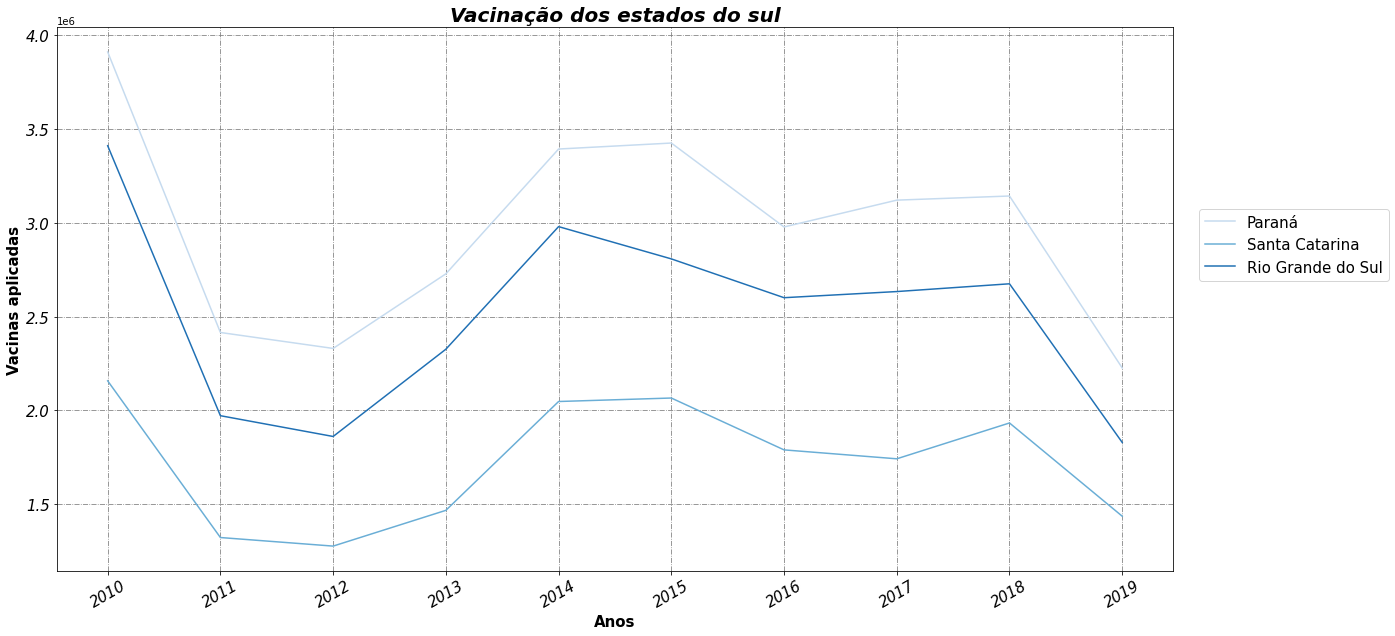

In [41]:
 plt.figure(figsize=(20,10))
 plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
 plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
 axLsul = sns.lineplot(data=sul, x="Ano",y="Vacinas aplicadas",hue="uf",palette='Blues')
 axLsul.set_title('Vacinação dos estados do sul', fontsize=20, fontstyle='oblique',fontweight=800)
 axLsul.set_ylabel('Vacinas aplicadas', fontsize=15, fontweight=600)
 axLsul.set_xlabel('Anos', fontsize=15, fontweight=600)
 plt.legend(bbox_to_anchor=(1.2, 0.6), loc="center right", fontsize=15, ncol=1)
 plt.grid(True, linestyle = "-.", color='gray')
 plt.show()

<Figure size 720x720 with 0 Axes>

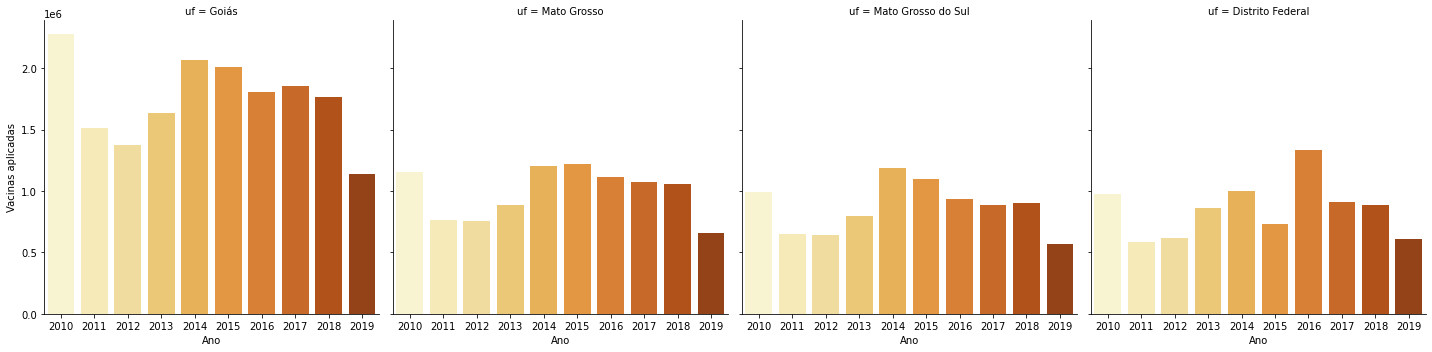

In [26]:
plt.figure(figsize=(10,10))
axcentrooeste = sns.catplot(data=centrooeste,x="Ano",y="Vacinas aplicadas", kind='bar',col="uf", palette=sns.color_palette("YlOrBr",11))
plt.show()

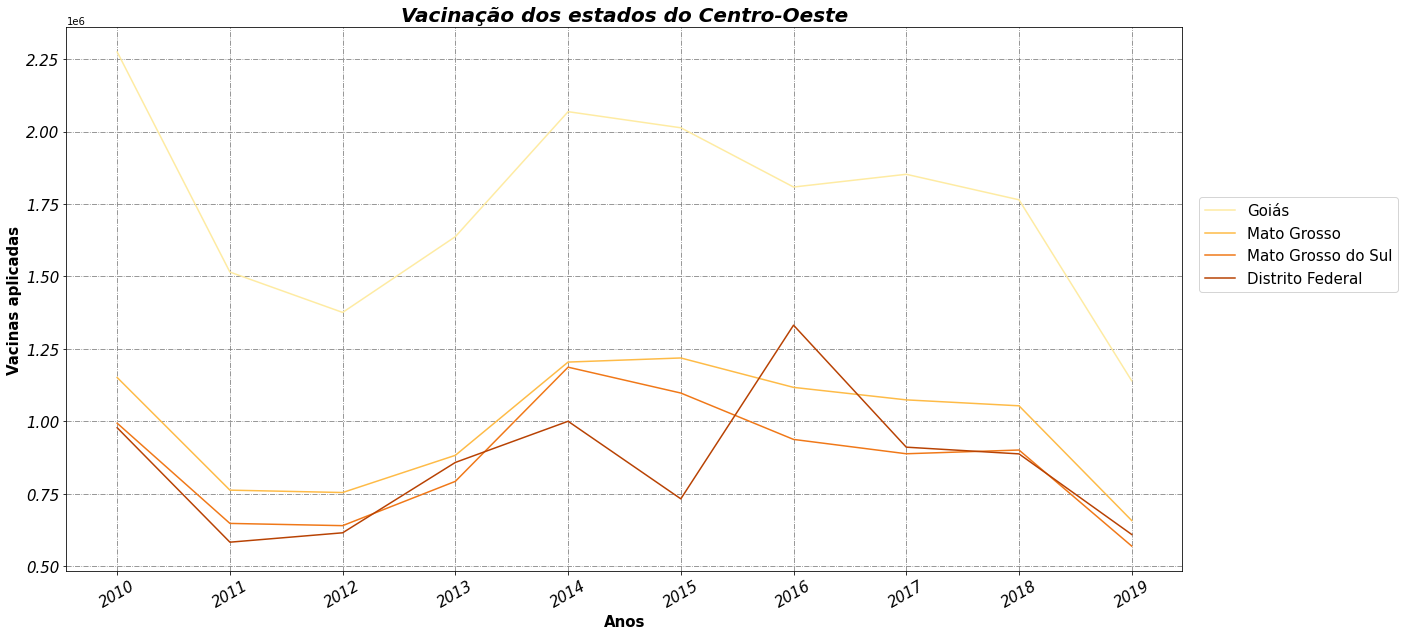

In [40]:
 plt.figure(figsize=(20,10))
 plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
 plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
 axLcentrooeste = sns.lineplot(data=centrooeste, x="Ano",y="Vacinas aplicadas",hue="uf",palette='YlOrBr')
 axLcentrooeste.set_title('Vacinação dos estados do Centro-Oeste', fontsize=20, fontstyle='oblique',fontweight=800)
 axLcentrooeste.set_ylabel('Vacinas aplicadas', fontsize=15, fontweight=600)
 axLcentrooeste.set_xlabel('Anos', fontsize=15, fontweight=600)
 plt.legend(bbox_to_anchor=(1.2, 0.6), loc="center right", fontsize=15, ncol=1)
 plt.grid(True, linestyle = "-.", color='gray')
 plt.show()

# A nível de curiosidade, descobri uma fórmula para inserir o valor de cada ano no topo da barra em um barplot

In [27]:
#formula pra botar o valor do barplot no topo da barra

# plot = sns.barplot(data=df2, x=''col1', y='col2',ci=false)
# for i in plot.patches:
#     plot.annotate(i.get_height(),
#                   (i.get_x()+i.get_width()/2, i.get_height()),
#                   ha='center', va='baseline', fontsize=12,
#                   color='black', xytext=(0,1),
#                   textcoords='offset points')

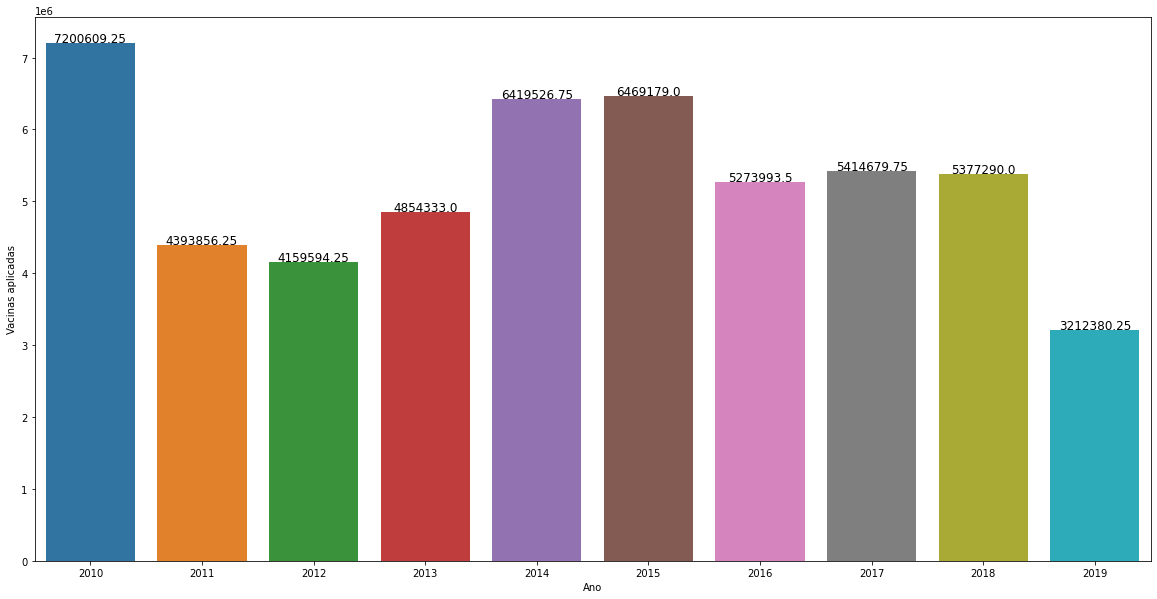

In [28]:
 plt.figure(figsize=(20,10))
 axsudeste = sns.barplot(data=sudeste, x='Ano', y='Vacinas aplicadas',ci=False)
 for i in axsudeste.patches:
     axsudeste.annotate(i.get_height(),
                   (i.get_x()+i.get_width()/2, i.get_height()),
                   ha='center', va='baseline', fontsize=12,
                   color='black', xytext=(0,1),
                   textcoords='offset points')

<Figure size 720x720 with 0 Axes>

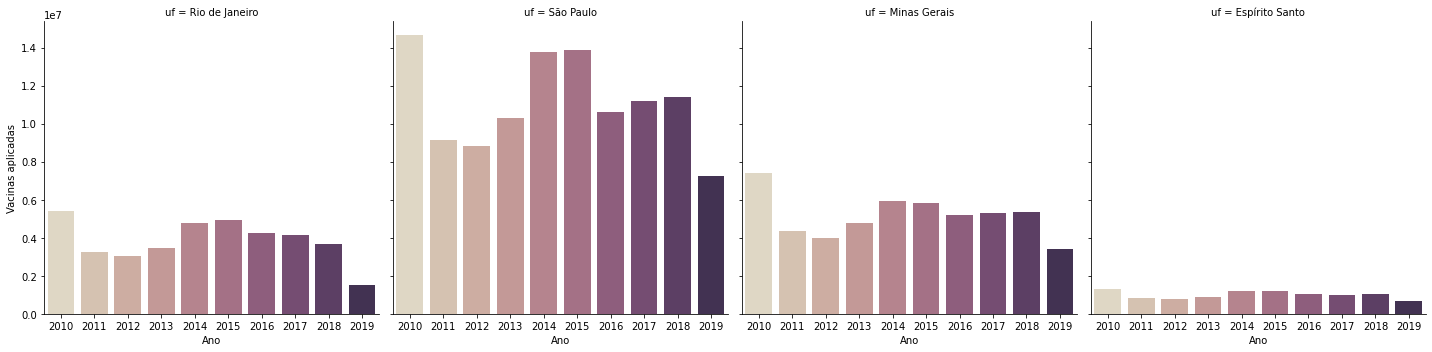

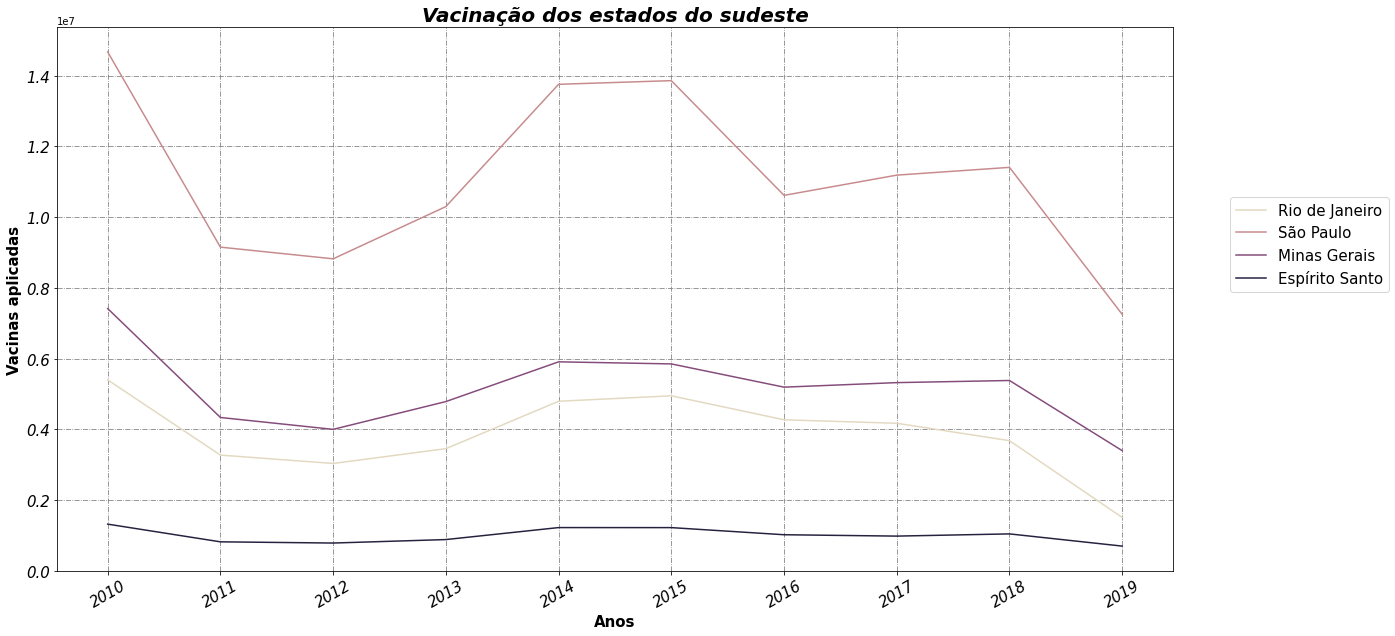

<Figure size 720x720 with 0 Axes>

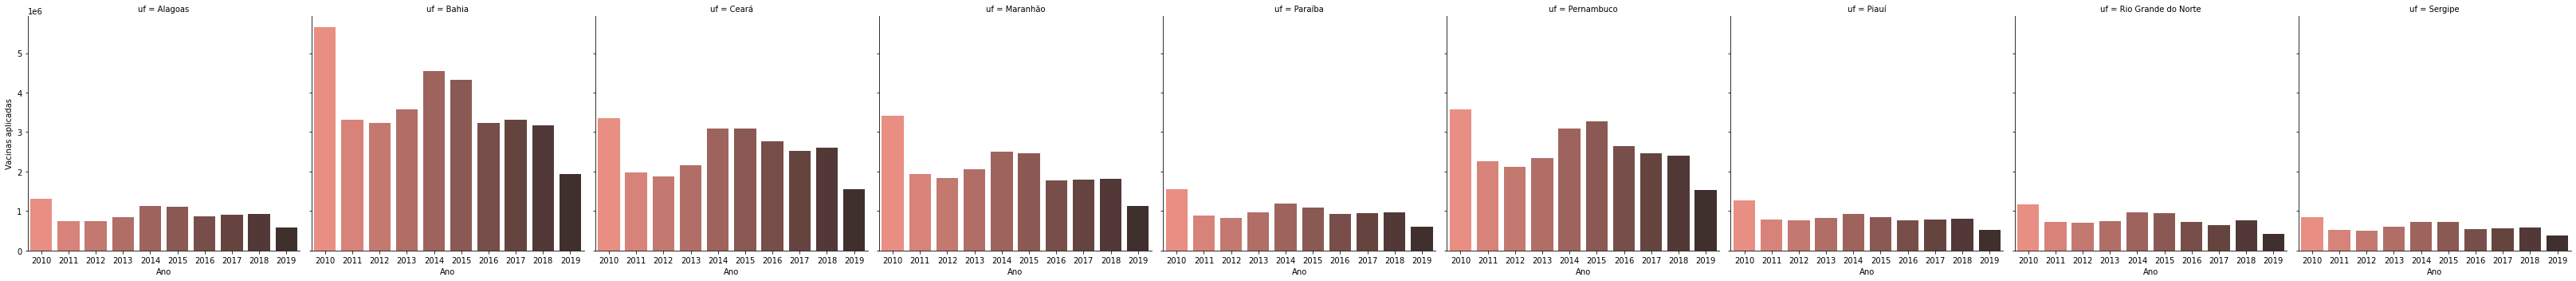

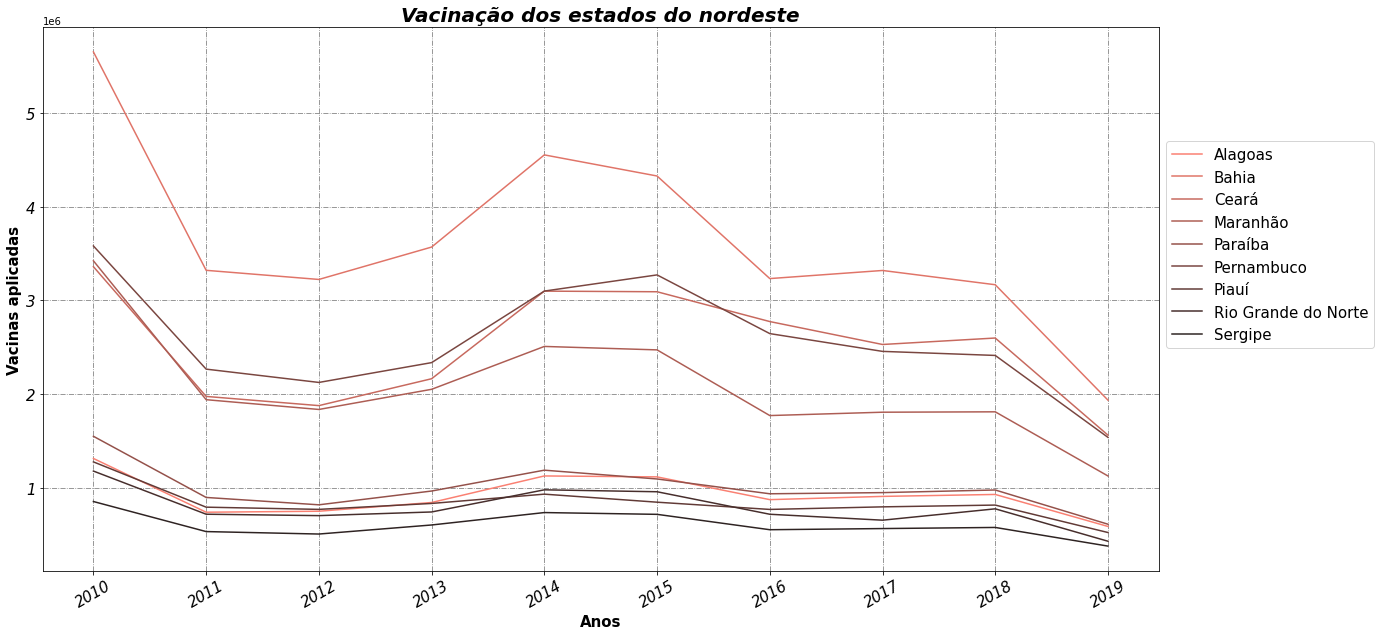

<Figure size 720x720 with 0 Axes>

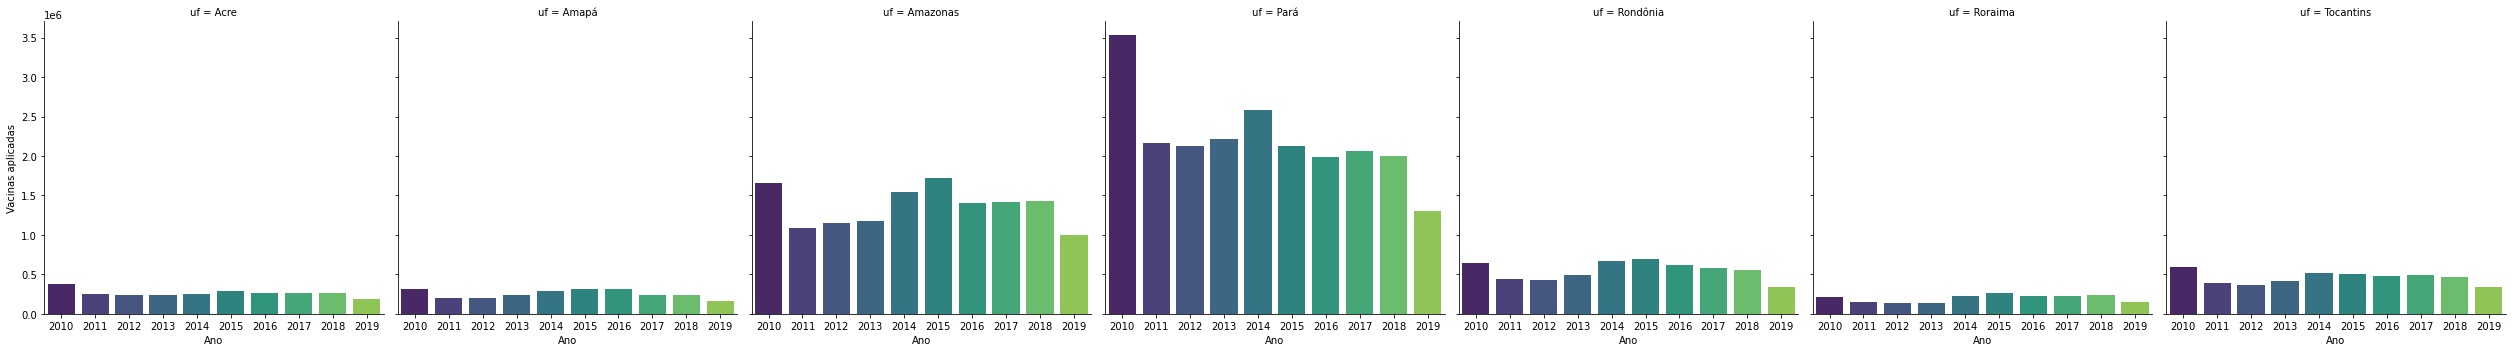

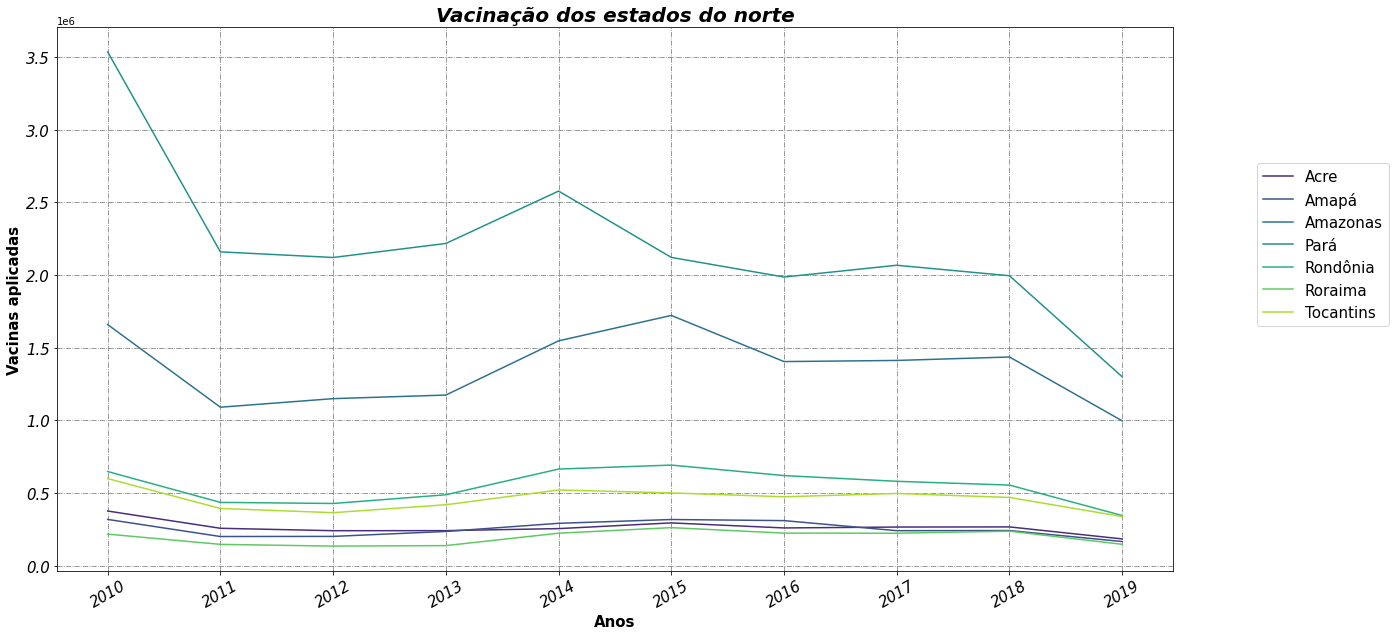

<Figure size 720x720 with 0 Axes>

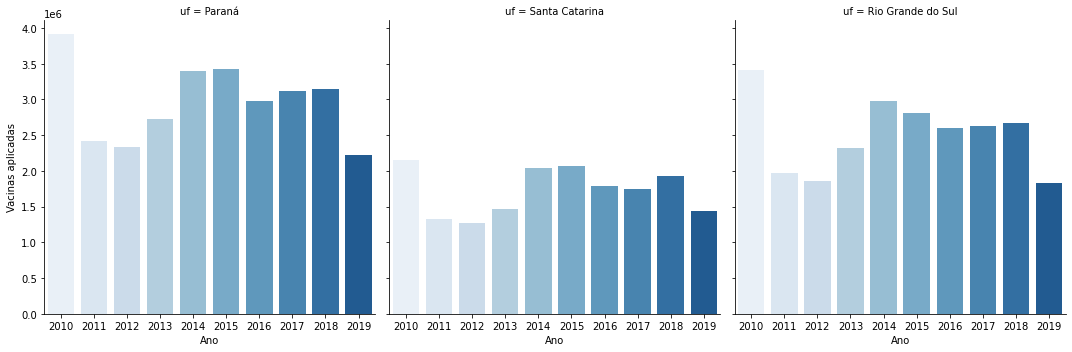

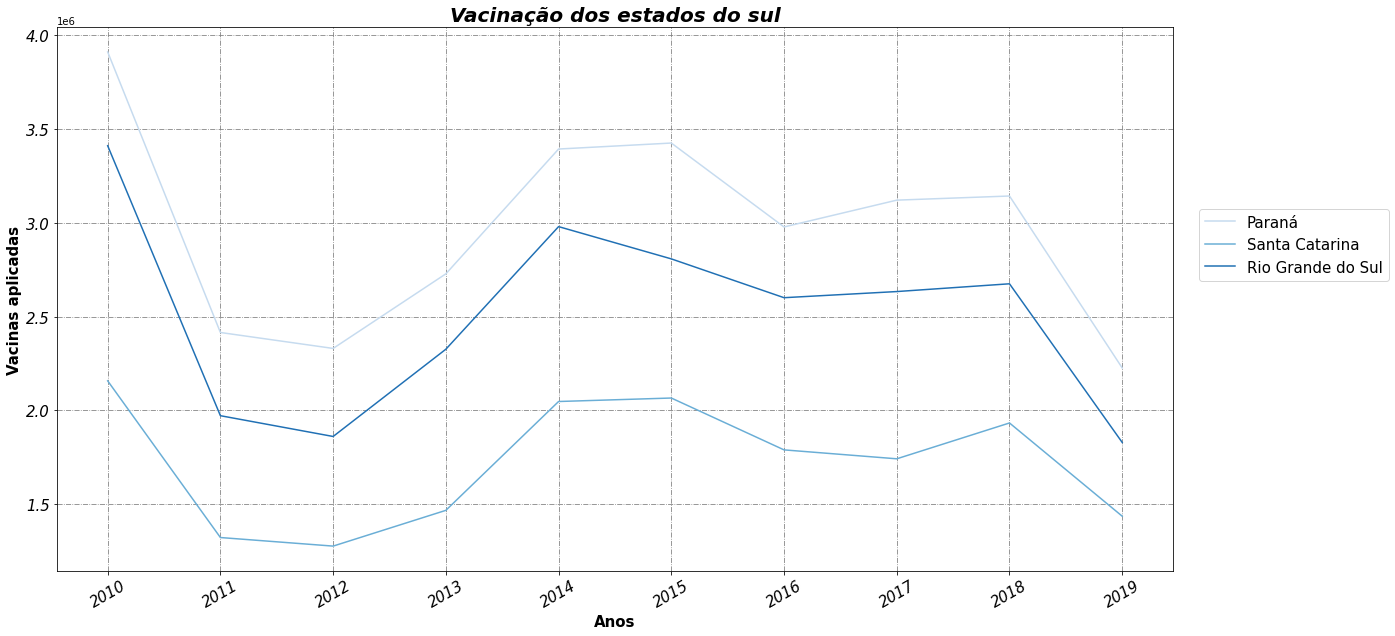

<Figure size 720x720 with 0 Axes>

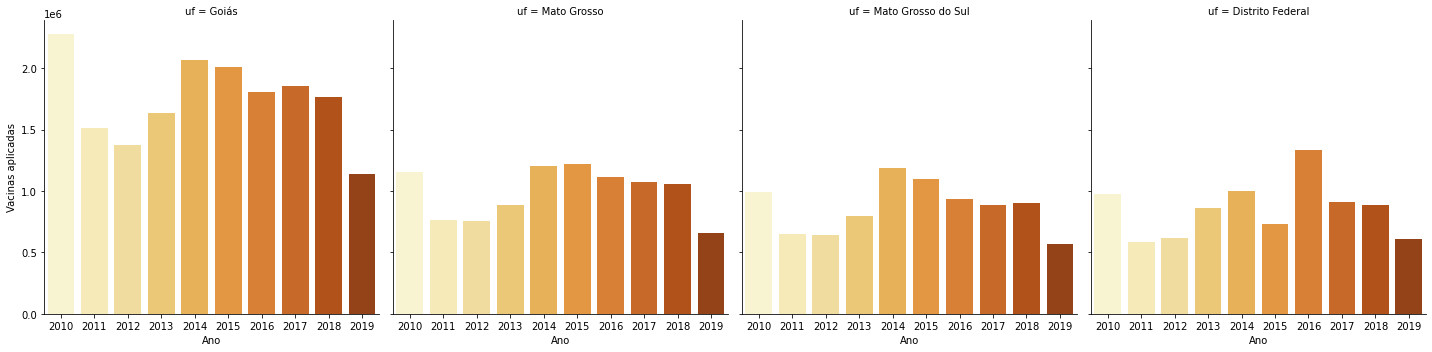

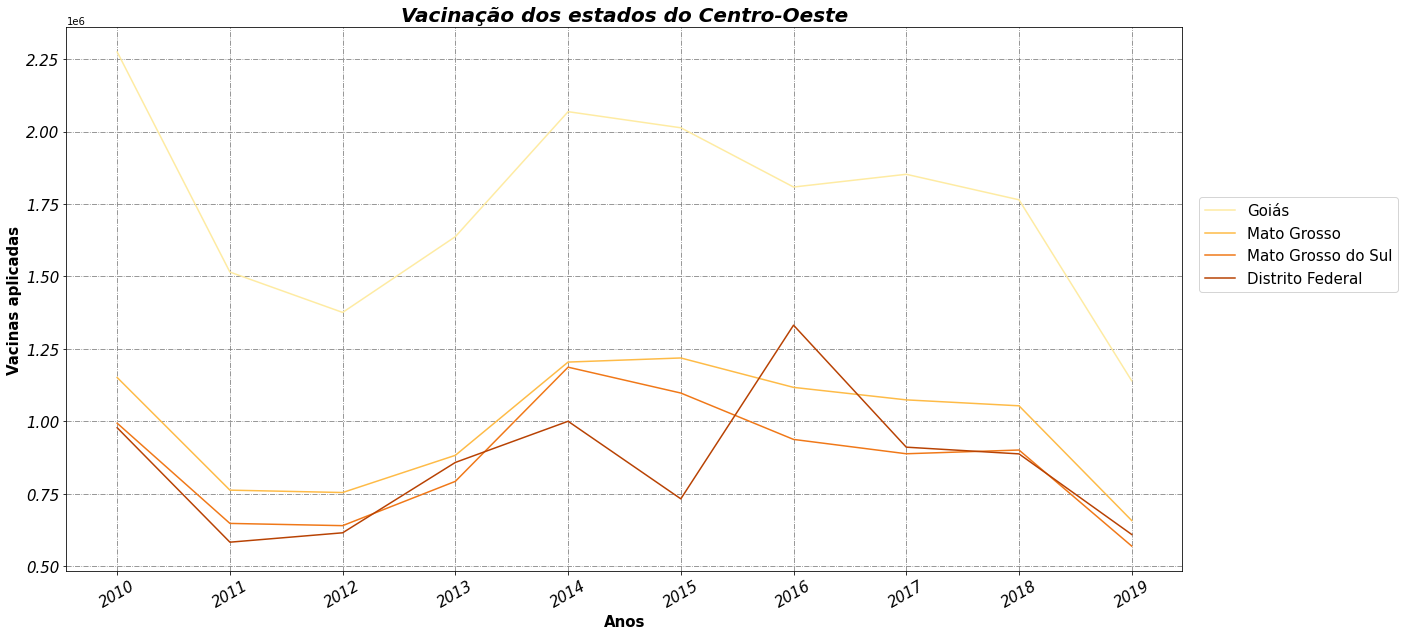

In [45]:
 plt.figure(figsize=(10,10))
 axsudeste = sns.catplot(data=sudeste,x="Ano",y="Vacinas aplicadas", kind='bar',col="uf", palette=sns.color_palette("ch:s=-.2,r=.6",11))
 plt.show()
 plt.figure(figsize=(20,10))
 plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
 plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
 axLsudeste = sns.lineplot(data=sudeste, x="Ano",y="Vacinas aplicadas",hue="uf",palette='ch:s=-.2,r=.6')
 axLsudeste.set_title('Vacinação dos estados do sudeste', fontsize=20, fontstyle='oblique',fontweight=800)
 axLsudeste.set_ylabel('Vacinas aplicadas', fontsize=15, fontweight=600)
 axLsudeste.set_xlabel('Anos', fontsize=15, fontweight=600)
 plt.legend(bbox_to_anchor=(1.2, 0.6), loc="center right", fontsize=15, ncol=1)
 plt.grid(True, linestyle = "-.", color='gray')
 plt.show()
 
 plt.figure(figsize=(10,10))
 axnordeste = sns.catplot(data=nordeste,x="Ano",y="Vacinas aplicadas", kind='bar',col="uf", palette=sns.color_palette("dark:salmon_r",11))
 plt.show()
 plt.figure(figsize=(20,10))
 plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
 plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
 axLnordeste = sns.lineplot(data=nordeste, x="Ano",y="Vacinas aplicadas",hue="uf",palette='dark:salmon_r')
 axLnordeste.set_title('Vacinação dos estados do nordeste', fontsize=20, fontstyle='oblique',fontweight=800)
 axLnordeste.set_ylabel('Vacinas aplicadas', fontsize=15, fontweight=600)
 axLnordeste.set_xlabel('Anos', fontsize=15, fontweight=600)
 plt.legend(bbox_to_anchor=(1.2, 0.6), loc="center right", fontsize=15, ncol=1)
 plt.grid(True, linestyle = "-.", color='gray')
 plt.show()
 
 plt.figure(figsize=(10,10))
 axnorte = sns.catplot(data=norte,x="Ano",y="Vacinas aplicadas", kind='bar',col="uf", palette=sns.color_palette("viridis",11))
 plt.show()
 plt.figure(figsize=(20,10))
 plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
 plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
 axLnorte = sns.lineplot(data=norte, x="Ano",y="Vacinas aplicadas",hue="uf",palette='viridis')
 axLnorte.set_title('Vacinação dos estados do norte', fontsize=20, fontstyle='oblique',fontweight=800)
 axLnorte.set_ylabel('Vacinas aplicadas', fontsize=15, fontweight=600)
 axLnorte.set_xlabel('Anos', fontsize=15, fontweight=600)
 plt.legend(bbox_to_anchor=(1.2, 0.6), loc="center right", fontsize=15, ncol=1)
 plt.grid(True, linestyle = "-.", color='gray')
 plt.show()
 
 plt.figure(figsize=(10,10))
 axsul = sns.catplot(data=sul,x="Ano",y="Vacinas aplicadas", kind='bar',col="uf", palette=sns.color_palette("Blues",11))
 plt.show()
 plt.figure(figsize=(20,10))
 plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
 plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
 axLsul = sns.lineplot(data=sul, x="Ano",y="Vacinas aplicadas",hue="uf",palette='Blues')
 axLsul.set_title('Vacinação dos estados do sul', fontsize=20, fontstyle='oblique',fontweight=800)
 axLsul.set_ylabel('Vacinas aplicadas', fontsize=15, fontweight=600)
 axLsul.set_xlabel('Anos', fontsize=15, fontweight=600)
 plt.legend(bbox_to_anchor=(1.2, 0.6), loc="center right", fontsize=15, ncol=1)
 plt.grid(True, linestyle = "-.", color='gray')
 plt.show()
 
 plt.figure(figsize=(10,10))
 axcentrooeste = sns.catplot(data=centrooeste,x="Ano",y="Vacinas aplicadas", kind='bar',col="uf", palette=sns.color_palette("YlOrBr",11))
 plt.show()
 plt.figure(figsize=(20,10))
 plt.xticks(rotation=30,fontsize=15, fontstyle='italic',fontweight=500)
 plt.yticks(fontsize=15, fontstyle='italic',fontweight=500)
 axLcentrooeste = sns.lineplot(data=centrooeste, x="Ano",y="Vacinas aplicadas",hue="uf",palette='YlOrBr')
 axLcentrooeste.set_title('Vacinação dos estados do Centro-Oeste', fontsize=20, fontstyle='oblique',fontweight=800)
 axLcentrooeste.set_ylabel('Vacinas aplicadas', fontsize=15, fontweight=600)
 axLcentrooeste.set_xlabel('Anos', fontsize=15, fontweight=600)
 plt.legend(bbox_to_anchor=(1.2, 0.6), loc="center right", fontsize=15, ncol=1)
 plt.grid(True, linestyle = "-.", color='gray')
 plt.show()